### Problem Statement:
The goal of this project is to analyze the price of gold. The price of gold is volatile, they change rapidly with time. Our main Aim of this project will be to predict the price of gold per unit.

### Importing the Libraries

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Data Collection and Processing

In [3]:
gold_data = pd.read_csv(r"C:\Users\anass\Downloads\gold_price_data.csv")

In [5]:
#Date format MM/DD/YYYY
#GLD = Gold Price
#USO = United States Oil Price
#SLV = Silver Price
#EU/USD = Euro and US doller currency
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_data.shape

(2290, 6)

In [9]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
#Checking the null values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
#Statistical measures
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [16]:
colname=[]
for x in gold_data.columns:
    if gold_data[x].dtype=='object':
        colname.append(x)
colname

['Date']

In [17]:
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()
 
for x in colname:
    gold_data[x]=le.fit_transform(gold_data[x])

### Correlation 
1.Positive Correlation
2.Negative Correlation

In [18]:
correlation = gold_data.corr()

<Axes: >

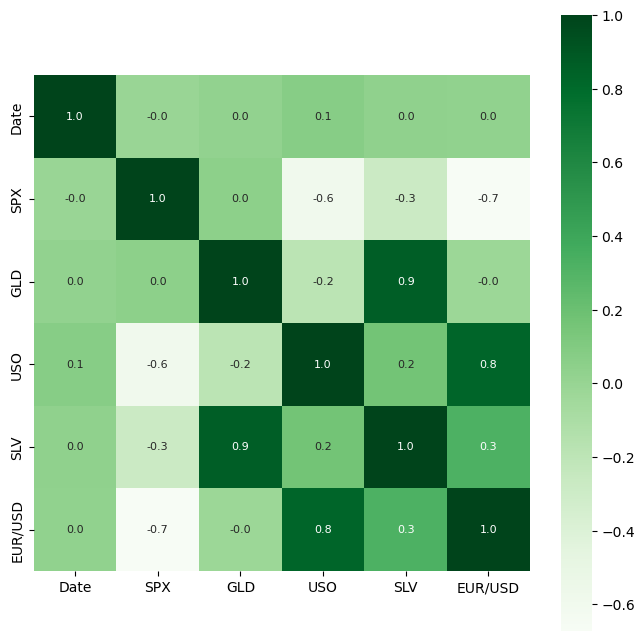

In [22]:
#Constructing heatmap to understand the correlation

plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8}, cmap='Greens')

In [24]:
#checking correlation of gold
print(correlation['GLD'])

Date       0.025020
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\anass\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


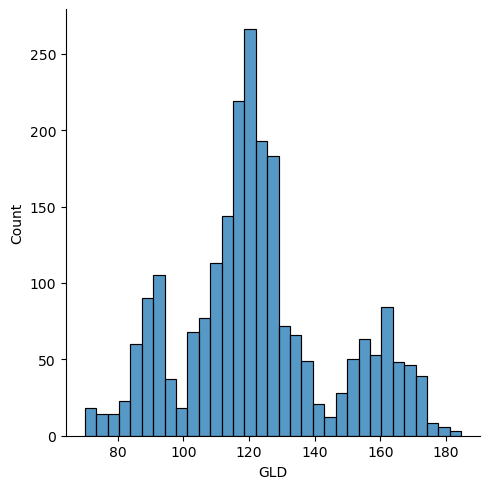

In [25]:
#Checking the distribution of gold price
sns.displot(gold_data['GLD'])

### Sppliting the Features and Target

In [26]:
X = gold_data.drop(['Date', 'GLD'],axis=1)
Y = gold_data['GLD']

In [28]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [29]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


#### Splitting into Training data and Test data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

#### Model Training: Random Forest Regression

In [34]:
regressor = RandomForestRegressor(n_estimators=100)

In [35]:
#training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

#### Model Evaluation

In [ ]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

print(test_data_prediction)

In [39]:
# R square error
error_score = metrics.r2_score(Y_test, test_data_prediction)

print('R squared error:', error_score)

R squared error: 0.9896948095821154


The R squared error is 0.98 and the data is in 100s so the 0.98 error indicates the model is perfoming very well.

#### Compare the Actual values and Predicted values in a plot

In [40]:
Y_test = list(Y_test)

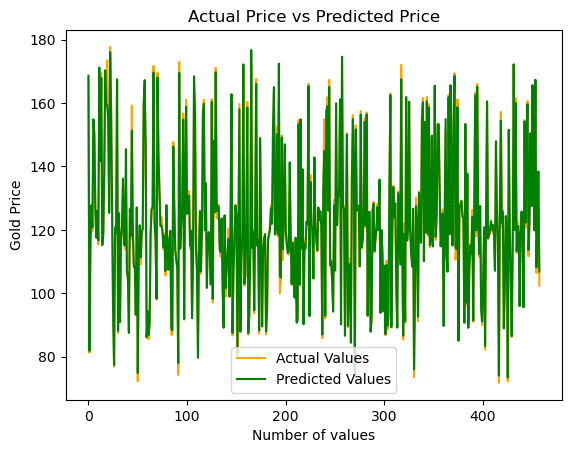

In [42]:
plt.plot(Y_test, color='orange', label = 'Actual Values')
plt.plot(test_data_prediction, color='green', label = 'Predicted Values')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

### Conclusion
As we can see the above polt that shows the actual values and predicted values that are very close to each  other that means random forest used sucessfully here to find gold prices based on some other stock prices.